In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pymc
import arviz

In [8]:
df = pd.read_csv("data/MMM_test_data.csv")

In [10]:
df.head(7)

,start_of_week,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7
0,30-08-20,157906.75,2625.48,262.71,12954.12,3609.63,12955.29,12659.12,19379.79
1,06-09-20,186425.68,2634.01,108.66,8760.28,4560.60,12747.70,12338.18,22473.45
2,13-09-20,161607.39,2087.08,110.32,7155.42,4362.96,15015.41,10811.15,22596.05
3,20-09-20,180089.13,1690.70,52.79,15185.22,3883.41,15521.41,12890.22,24728.73
4,27-09-20,217793.98,1547.30,80.56,18524.05,4043.09,15793.74,12642.55,26515.48
5,04-10-20,195581.04,3655.19,525.06,18024.45,9739.47,20804.05,25445.63,30394.41
6,11-10-20,146951.61,6459.43,640.94,24012.09,7048.24,33009.65,33692.83,37544.71


In [13]:
df.dtypes

start_of_week       object
revenue            float64
spend_channel_1    float64
spend_channel_2    float64
spend_channel_3    float64
spend_channel_4    float64
spend_channel_5    float64
spend_channel_6    float64
spend_channel_7    float64
dtype: object

In [15]:
df.columns

Index(['start_of_week', 'revenue', 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7'],
      dtype='object')

In [57]:
total_revenue = df["revenue"].sum(axis=0)
total_spend = (df.loc[:,"spend_channel_1":"spend_channel_7"].sum(axis=0)).sum()
print(f"Total Revenue: {total_revenue:.0f}")
print(f"Total Spend: {total_spend:.0f}")
print(f"ROAS (Total Revenue / Total Spend): {total_revenue/total_spend:.3f}")

Total Revenue: 14194980
Total Spend: 7212633
ROAS (Total Revenue / Total Spend): 1.968


In [26]:
df.describe()

,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,136490.190673,1245.604808,343.640962,19507.177981,6915.136731,8575.611442,5063.699038,27701.367404
std,50810.253012,1388.384632,332.988218,8714.759886,3123.172035,6956.787524,6689.472660,12176.293684
min,63207.090000,0.000000,4.370000,5938.130000,3602.200000,747.460000,0.000000,9391.210000
25%,101675.685000,334.275000,120.470000,13879.000000,5113.937500,2902.032500,0.000000,19797.710000
50%,128790.460000,856.870000,202.020000,17929.450000,6194.400000,6879.270000,2423.095000,24248.640000
75%,157707.280000,1658.032500,553.075000,22252.262500,7470.557500,14367.582500,8701.960000,33852.652500
max,418186.380000,8513.830000,1605.850000,49689.380000,22629.690000,33009.650000,33692.830000,77488.420000


In [93]:
df_1 = df.copy()
df_1['start_of_week'] = pd.to_datetime(
    df_1['start_of_week'], format='%d-%m-%y'
)
df_1 = df_1.set_index(df_1['start_of_week'])

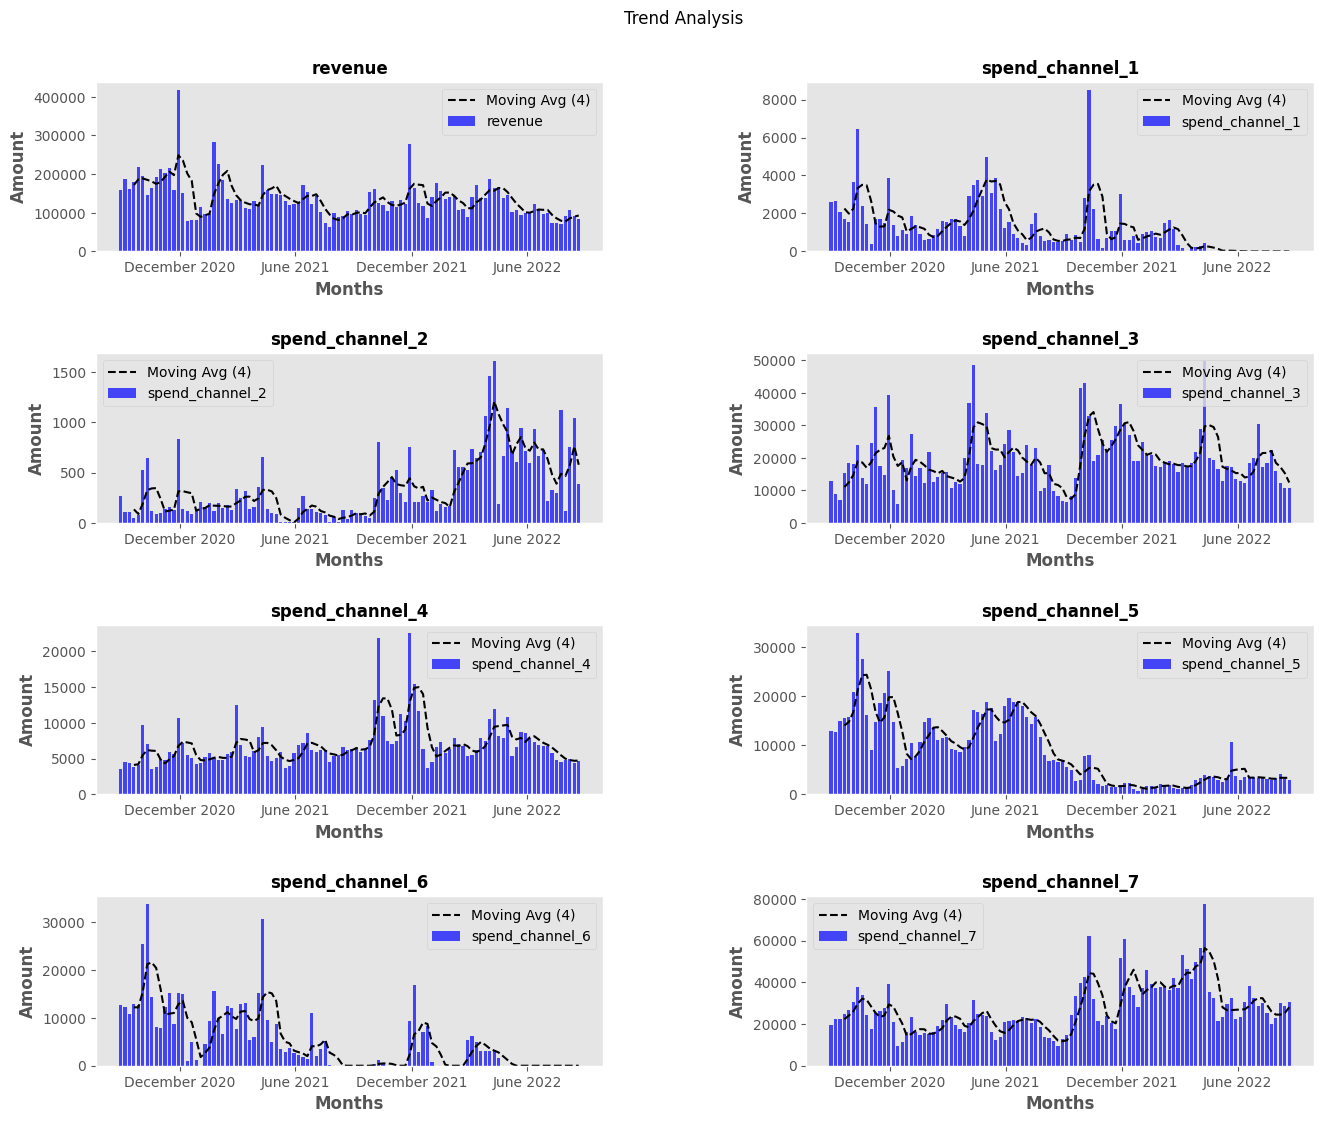

In [118]:
# Analyse Trends

%matplotlib inline

columns_to_plot = df_1.loc[:,"revenue":"spend_channel_7"].columns.tolist() 

fig, axs = plt.subplots(4, 2, figsize=(14,12))
fig.suptitle("Trend Analysis")
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    
    ax.bar(df_1.index, df_1[col], width=5, label=col, alpha=0.7,color='blue')

    moving_avg = df_1[col].rolling(window=4).mean()
    
    ax.plot(df_1.index, moving_avg, linestyle='--', color='black', label='Moving Avg (4)')
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(6,12)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))

    ax.set_title(col, fontsize=12,fontweight='bold')
    ax.set_xlabel('Months',fontsize=12,fontweight='bold')
    ax.set_ylabel('Amount', fontsize=12,fontweight='bold')
    ax.grid(False)
    ax.legend()

plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1, hspace=0.6, wspace=0.4)
plt.show()
